# Homework 2

**Gonçalo Meneses, 103401 e Tomás Arêde, 103239**

Antes de começar, vamos remover os avisos que surgem ao longo deste notebook.

In [41]:
import warnings
warnings.filterwarnings('ignore')

Começamos, então, por carregar o nosso ficheiro _csv_ e criar o data frame que irá armazenar os nossos dados.

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("winequality-red.csv",delimiter=';')

df = pd.DataFrame(data)

X = df.drop('quality', axis=1)
y = df['quality']

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exercício 1

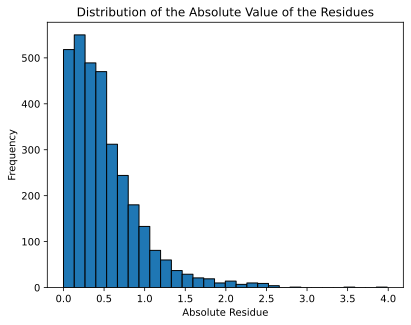

In [43]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

residue_list = []

mae_scores = []
mae_rounded_scores = []

rmse_early_scores = []

for state in range(1, 11):

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=state)
    mlp_regressor.fit(X_train, y_train)

    y_pred = mlp_regressor.predict(X_test)

    residues = np.abs(y_pred - y_test)
    residue_list.extend(residues)
    
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    mae_scores.append(mae)

    y_pred_rounded = np.round(y_pred)
    y_pred_rounded_bounded = np.clip(y_pred_rounded, 1, 10)

    mae_rounded = mean_absolute_error(y_true=y_test, y_pred=y_pred_rounded_bounded)
    mae_rounded_scores.append(mae_rounded)
    
    rmse_early = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
    rmse_early_scores.append(rmse_early)

plt.hist(residue_list, bins=30, edgecolor='k')
plt.xlabel('Absolute Residue')
plt.ylabel('Frequency')
plt.title('Distribution of the Absolute Value of the Residues')
plt.show()

### Exercício 2

In [44]:
avg_mae_scores = np.average(mae_scores)
avg_rounded_mae_scores = np.average(mae_rounded_scores)

print(f'Average of the Mean Absolute Errors: {avg_mae_scores:.5f}')
print(f'Average of the Mean Absolute Erros with rounding and bounding: {avg_rounded_mae_scores:.5f}')

if avg_rounded_mae_scores < avg_mae_scores:
    print('Rounding and bounding estimates is beneficial to the performance of our MLP classifier.')
else:
    print("Our MLP classifier doesn't benefit from rounding and bounding estimates.")

Average of the Mean Absolute Errors: 0.50972
Average of the Mean Absolute Erros with rounding and bounding: 0.43875
Rounding and bounding estimates is beneficial to the performance of our MLP classifier.


### Exercício 3

The average RMSE score for Early Stopping is: 0.67065
The average RMSE for 20 iterations is: 1.40398
The average RMSE for 50 iterations is: 0.79961
The average RMSE for 100 iterations is: 0.69404
The average RMSE for 200 iterations is: 0.65545


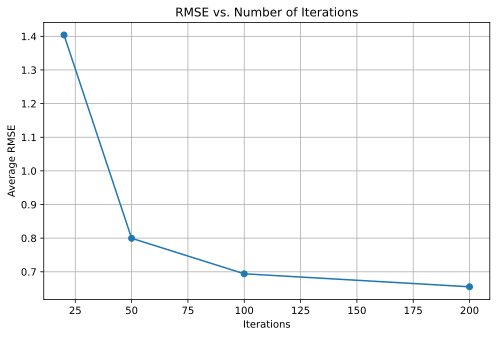

In [45]:
num_iterations = [20, 50, 100, 200]

rmse_scores = []

for random_state in range(1, 11):
    for iter in num_iterations:
        
        mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', max_iter=iter, random_state=random_state)
        
        mlp_regressor.fit(X_train, y_train)
        
        y_pred = mlp_regressor.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
        rmse_scores.append((iter, rmse))

avg_rmse_early_score = np.average(rmse_early_scores)

print(f'The average RMSE score for Early Stopping is: {avg_rmse_early_score:.5f}')

average_rmse_scores = {}

for iter, rmse in rmse_scores:
    average_rmse_scores.setdefault(iter, []).append(rmse)

iters, avg_rmse_values = zip(*[(iter, np.mean(rmse_list)) for iter, rmse_list in average_rmse_scores.items()])
[print(f'The average RMSE for {iter} iterations is: {avg_rmse:.5f}') for iter, avg_rmse in zip(iters, avg_rmse_values)]

plt.figure(figsize=(8, 5))
plt.plot(iters, avg_rmse_values, marker='o')
plt.title('RMSE vs. Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Average RMSE')
plt.grid(True)
plt.show()

### Exercício 4

Apesar de, como se pode ver acima, o valor do _RMSE_ ter diminuído com o número de iterações, é importante destacar alguns pontos.

Primeiro, o valor do erro associado a 20 iterações é de longe o mais alto, quando comparado aos das restantes iterações. Isso significa que, neste caso, o nosso modelo requer um grande número de iterações para treinar o modelo, ou seja, se utilizarmos _Early Stopping_, este poderá causar um término precoce do nosso treino, o que levará a um _underfitting_ e, consequentemente, a uma performance subóptima.

Segundo, à medida que o número de iterações aumenta (neste caso, 20, 50, 100, 200), a performance do nosso modelo também, e, em troca, o valor do _RMSE_ diminui, porém, em incrementos cada vez mais pequenos. Assim, para um número suficientemente grande de iterações poderá haver um _overfitting_ para os dados de treino, pelo que a utilização de _Early Stopping_, face ao número máximo de iterações, impediria que tal acontecesse. Isto é possível, uma vez que este método de regularização para o treino quando a performance do modelo para um conjunto de validação diminui e mantém a sua capacidade de generalização.

Finalmente, podemos concluir que um bom balanço entre _Early Stopping_ e um número adequado de iterações é essencial para uma performance óptima do modelo, impedindo tanto um _underfit_ como um _overfit_.